# This script processes the optim 4 (minRadius - maxNumber) results of the minRadius and maxNumber studies

1. Compile o3memo (includes minRadius=0.1 by default) and o4maxnum (has maxNumber=32 by default) :
```
make bin/o3memo
make bin/o4maxnum
```
2. Run the benchmarking script
```
cd scripts
python3 run_minrad_level.py
python3 run_maxnum_level.py
```
3. The output that we will process is o4_minradius_coffee.csv and o4_maxnumber_coffee.csv



In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import sys
from statistics import mean

def tokenize(filename, type='minRadius'):
    results ={}

    with open(filename) as f:
        next(f) # skip header
        for line in f:
            tokens = line.split()
            name=tokens[1].split("/")[3][:-5]
            level=int(tokens[5])
            if type == 'minRadius':
                minRad = float(tokens[3])
            else:
                minRad = int(tokens[4])
            if name not in results:
                results[name]={}
            if level not in results[name]:
                results[name][level]={}
            results[name][level][minRad]=[float(tokens[6])] # tree construction time
            results[name][level][minRad].append(float(tokens[7])) # owm time
            results[name][level][minRad].append(float(tokens[6])+float(tokens[7])) # total time
            results[name][level][minRad].append(float(tokens[8])) # accuracy
    return results

resR=tokenize("o4_minradius_coffee.csv","minRadius")
resN=tokenize("o4_maxnumber_coffee.csv","maxNumber")

# Tree construction execution time for each cloud depending on level and minRadius

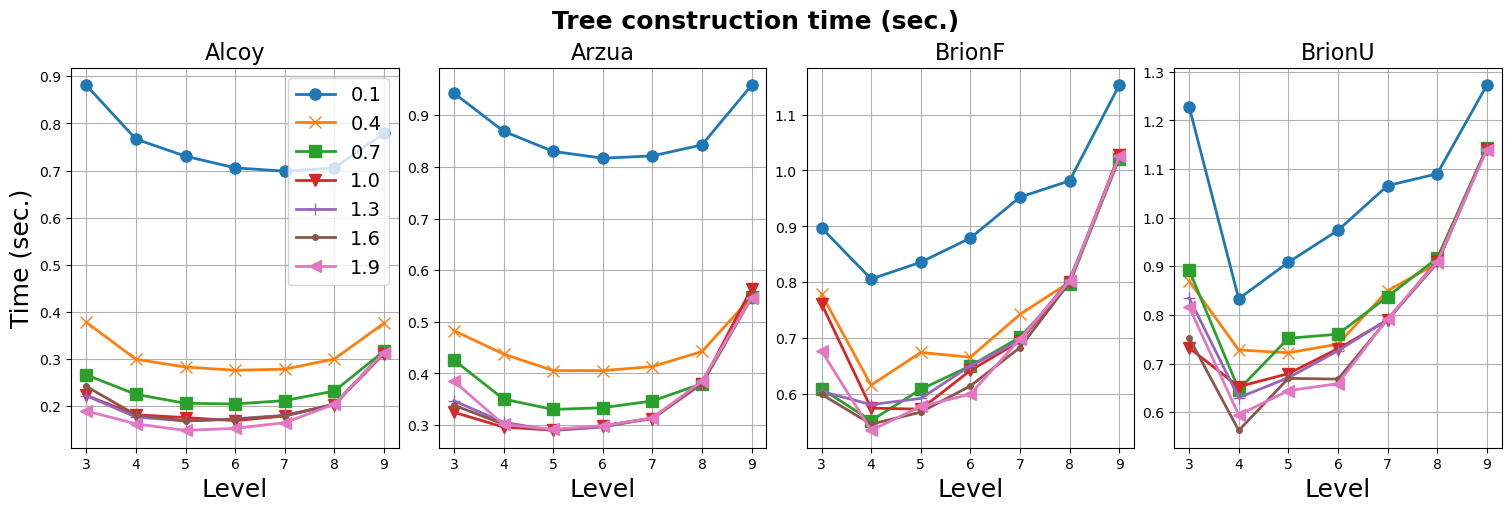

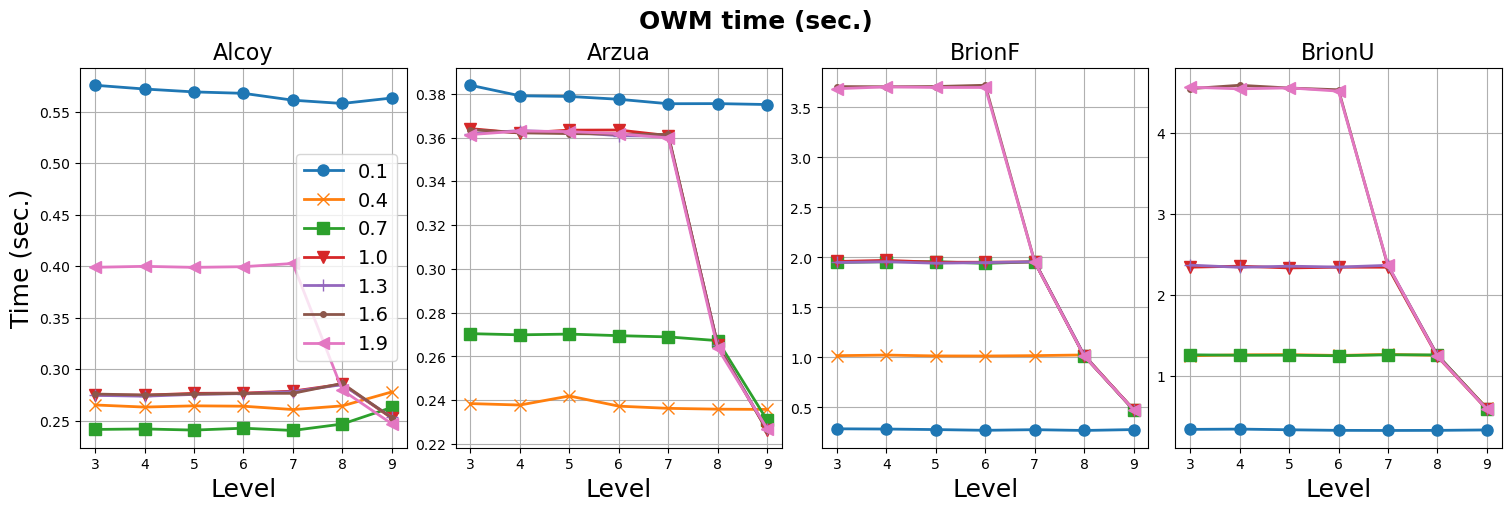

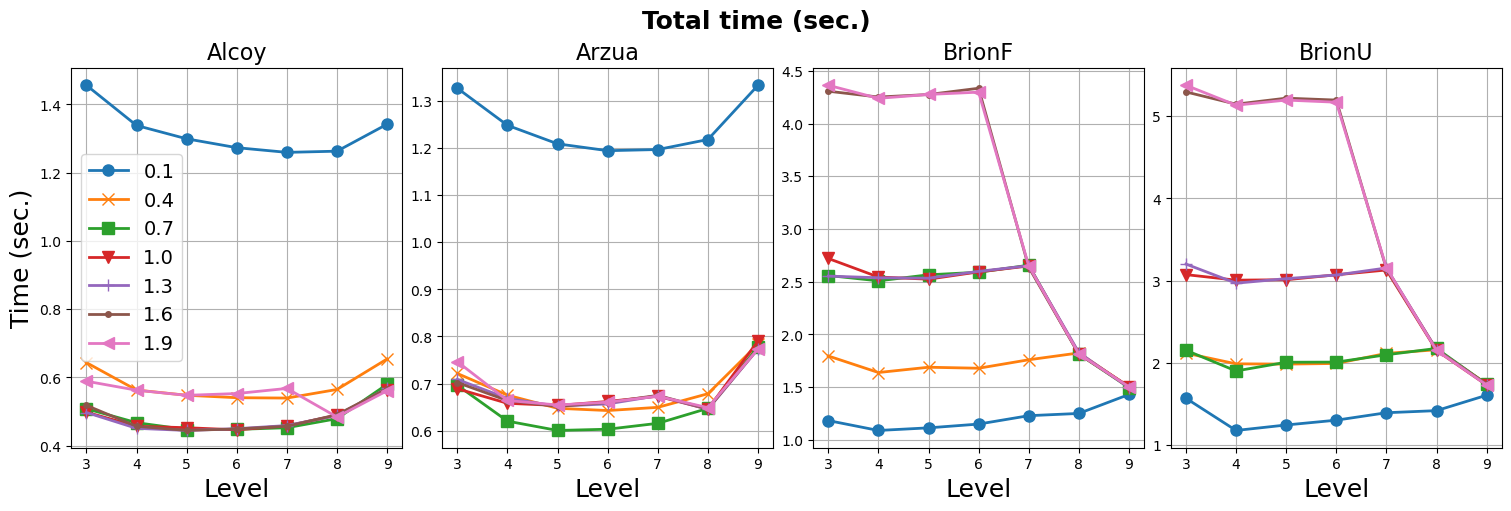

In [92]:
def plot_alltimes(step,results,phase,maxNummode=False):
    #Configuration variables
    titlefs = 20
    ylabelfs = 18
    xlabelfs = 18
    xticksfs = 16
    yticksfs = 16
    legendfs = 14
    linew = 2
    markers = 8
    marks=['o-','x-','s-','v-','+-','.-','<-','>-','1-','2-','3','4','8','p','h','H','*','D','d','|','_']

    titles=['Tree construction time','OWM time','Total time']
    #fig = plt.figure()
    #labels=[x/10 for x in list(range(1,20,step))]
    if maxNummode:
        labels=list(results["Alcoy"][3].keys())[1:-4:step]
    else:
        labels=list(results["Alcoy"][3].keys())[::step]
    #print(labels)
    #define grid of plots
    fig, axs = plt.subplots(nrows=1, ncols=4,figsize=(15, 5), constrained_layout=True) #sharey=True
    for i,name in zip(range(4),['Alcoy','Arzua','BrionF','BrionU']):
        x=list(results[name].keys())
        for minrad,m in zip(labels,marks):
            #print(name," ",[results[name][i][minrad][phase] for i in x])
            axs[i].plot(np.array(x), np.array([results[name][i][minrad][phase] for i in x]),m, linewidth=linew, markersize=markers)
        
        axs[i].set_title(name,fontsize=16)
        axs[i].set_xlabel('Level', fontsize=xlabelfs)
        axs[i].set_xticks(x[::1],fontsize=xticksfs)
        # axs[i].yticks(fontsize=yticksfs)
        axs[i].grid()


    fig.suptitle(titles[phase]+' (sec.)',  fontweight='bold', fontsize=18)
    axs[0].set_ylabel('Time (sec.)', fontsize=ylabelfs)
    axs[0].legend(labels,loc='best', fontsize= 14)
    #axs[i].show()
    if(phase==0):
        if(maxNummode):
            plt.savefig("MaxNum-Level.pdf")
        else:
            plt.savefig("MinRad-Level.pdf")
    # pp = PdfPages("MinRad-Level.pdf")
    # pp.savefig(fig)
    # pp.close()

plot_alltimes(3,resR,0)
plot_alltimes(3,resR,1)
plot_alltimes(3,resR,2)

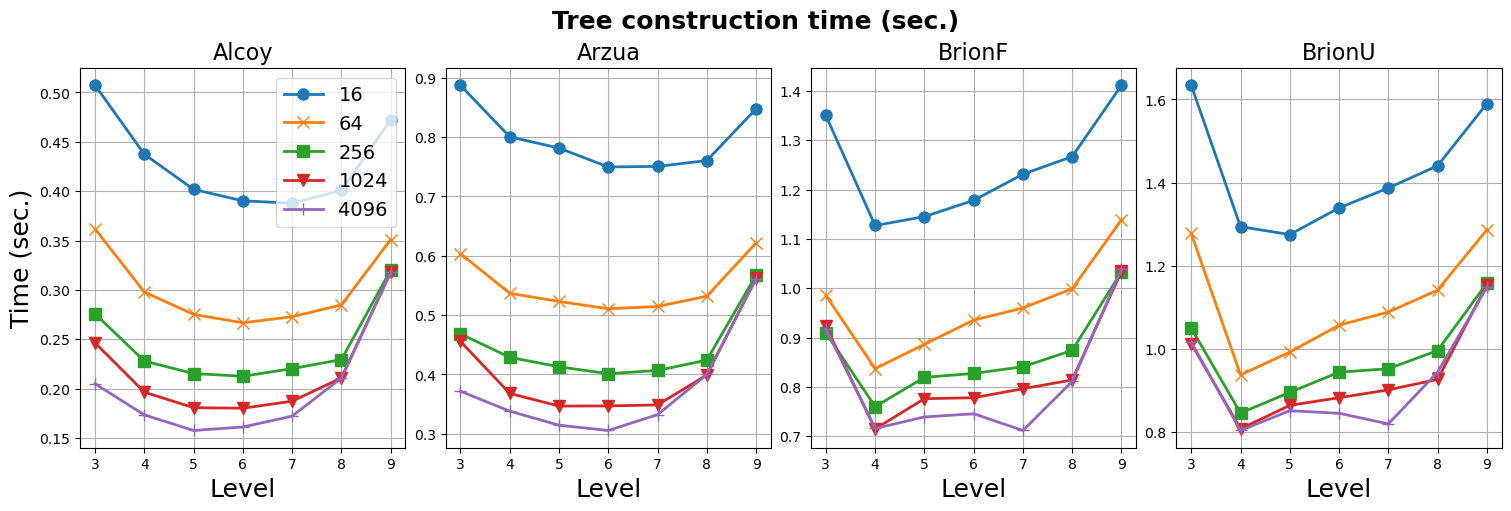

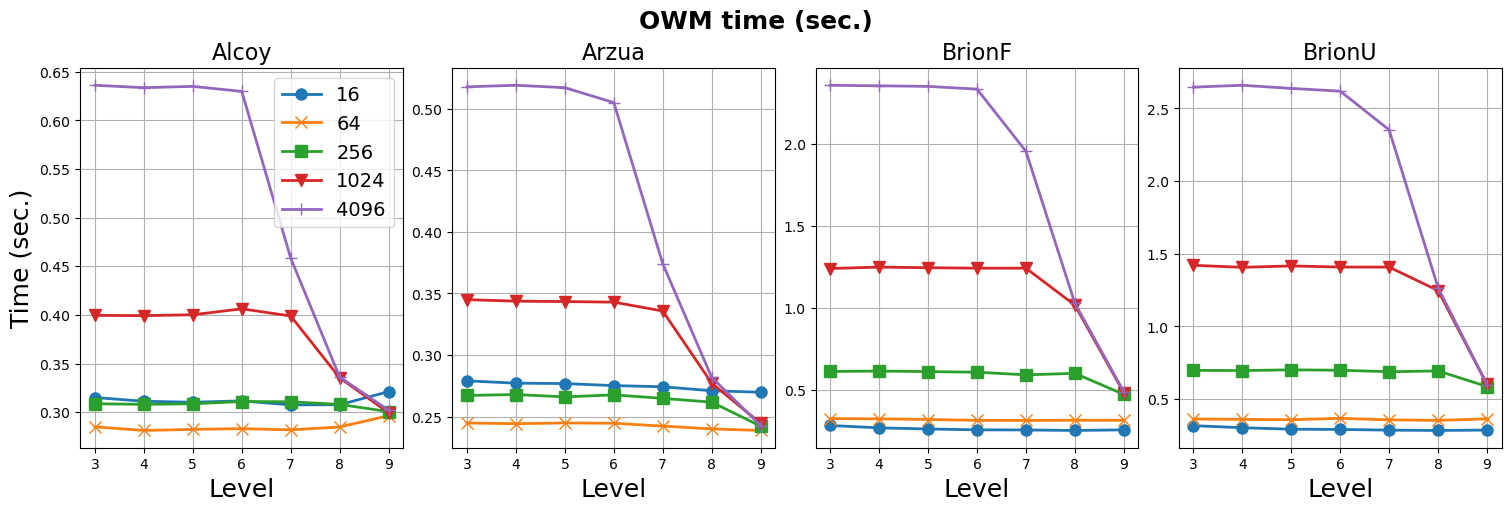

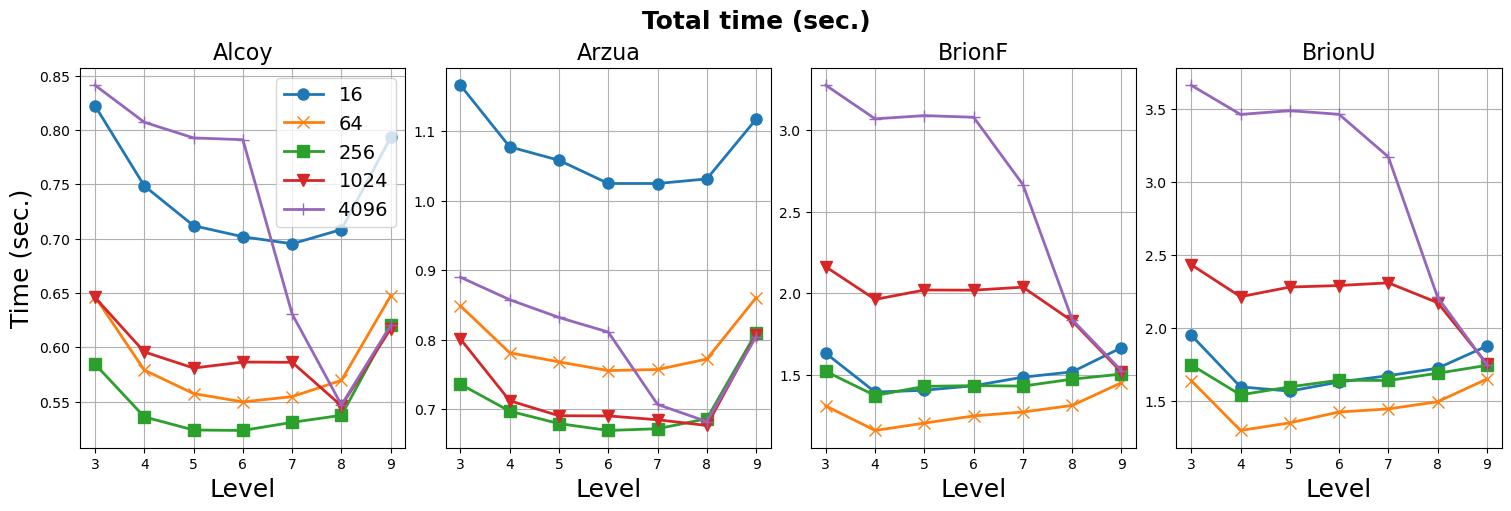

In [93]:
#For MaxNumber
plot_alltimes(2,resN,0,True)
plot_alltimes(2,resN,1,True)
plot_alltimes(2,resN,2,True)

# Time for best level [5, 5, 4, 4] for minradius and [6,6,4,4] for maxnumber

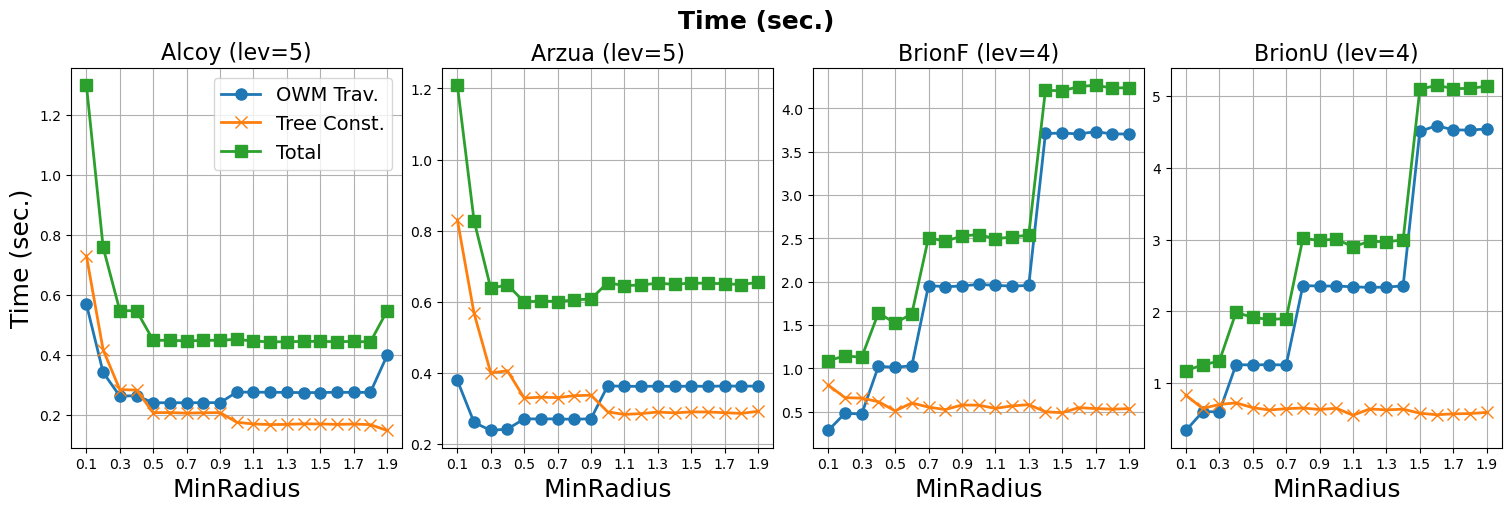

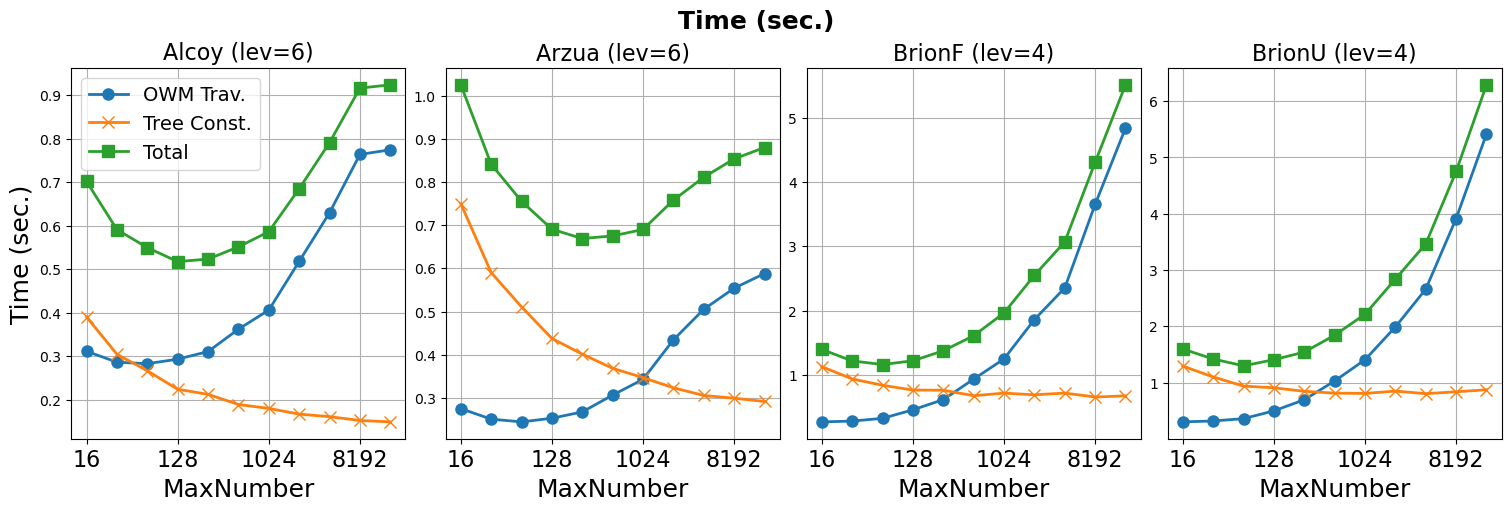

In [94]:
def plot_bestlevel(bestlevel,step,results,figname,maxNummode=False):
    #Configuration variables
    titlefs = 20
    ylabelfs = 18
    xlabelfs = 18
    xticksfs = 16
    yticksfs = 16
    legendfs = 14
    linew = 2
    markers = 8
    marks=['o-','x-','s-','v-','+-','.-','<-','>-','1-','2-','3','4','8','p','h','H','*','D','d','|','_']

    titles=['OWM Trav.','Tree Const.','Total']
    #fig = plt.figure()
    #labels=[x/10 for x in list(range(1,20,step))]
    if maxNummode:
        x=list(results["Alcoy"][3].keys())[1:-2:step]
    else:
        x=list(results["Alcoy"][3].keys())[::step]
    #define grid of plots
    fig, axs = plt.subplots(nrows=1, ncols=4,figsize=(15, 5), constrained_layout=True) #sharey=True
    for i,name in zip(range(4),['Alcoy','Arzua','BrionF','BrionU']):
        #x=list(results[name][bestlevel[i]].keys())
        xticks=range(1,len(x)+1)
        for k,m in zip([1,0,2],marks):
            if(maxNummode):
               axs[i].plot(np.array(xticks), np.array([results[name][bestlevel[i]][j][k] for j in x]),m, linewidth=linew, markersize=markers)
            else:
               axs[i].plot(np.array(x), np.array([results[name][bestlevel[i]][j][k] for j in x]),m, linewidth=linew, markersize=markers)
        
        axs[i].set_title(name+" (lev="+str(bestlevel[i])+")",fontsize=16)
        if(maxNummode):
            axs[i].set_xlabel('MaxNumber', fontsize=xlabelfs)
        else:
            axs[i].set_xlabel('MinRadius', fontsize=xlabelfs)
        if(maxNummode):    
            axs[i].set_xticks(ticks=xticks[::3], labels=x[::3],fontsize=xticksfs)
        else:
            axs[i].set_xticks(x[::2],fontsize=xticksfs)
        # axs[i].yticks(fontsize=yticksfs)
        axs[i].grid()


    fig.suptitle('Time (sec.)',  fontweight='bold', fontsize=18)
    axs[0].set_ylabel('Time (sec.)', fontsize=ylabelfs)
    axs[0].legend(titles,loc='best', fontsize= 14)
    #axs[i].show()
    pp = PdfPages(figname)
    pp.savefig(fig)
    pp.close()

plot_bestlevel([5,5,4,4], 1,resR,"MinRad-8cores-time.pdf")
plot_bestlevel([6,6,4,4], 1,resN,"MaxNum-8cores-time.pdf",True)

In [88]:
#For the best level (see next cell) find the min and max accuracy for all minRadius
def findbestlevel_radius(res,phase):
    bestlevel=[]
    for cloud, c in res.items():
        bestlevel.append((cloud,min( ((i, (k0, {k1: i}) ) 
        for k0, d in c.items()
        for k1, i in d.items()), key=lambda x: x[0][phase])[1]))
    for i in range(len(bestlevel)):
        print(bestlevel[i])
    return bestlevel

print("Best level and minRadius for each cloud, minimizing Tree Const. time")
print("Cloud, Level, MinRadius, [Tree Const.,OWM Trav., Total, Accuracy]")
findbestlevel_radius(resR,0)
print("\nBest level and minRadius for each cloud, minimizing OWM traversal time")
print("Cloud, Level, MinRadius, [Tree Const., OWM Trav., Total, Accuracy]")
findbestlevel_radius(resR,1)
print("\nBest level and minRadius for each cloud, minimizing Total time")
print("Cloud, Level, MinRadius, [Tree Const., OWM Trav., Total, Accuracy]")
bestTotalR=findbestlevel_radius(resR,2)

# print ("Cloud & Min accuracy & Max accuracy\\\\ \hline")
# for i,k in zip(res1,[0.7,0.3,0.2,0.1]):
#     accuracy=[res1[i][k][j][3] for j in [1,2,4,6,8]]
#     minaccuracy=min(accuracy)
#     maxaccuracy=max(accuracy)
#     print ("{} & {:0.2f}\% & {:0.2f}\%\\\\ \hline".format(i,minaccuracy,maxaccuracy))

Best level and minRadius for each cloud, minimizing Tree Const. time
Cloud, Level, MinRadius, [Tree Const.,OWM Trav., Total, Accuracy]
('Alcoy', (5, {1.9: [0.148579, 0.39875, 0.547329, 99.6608]}))
('Arzua', (5, {1.1: [0.282929, 0.362128, 0.645057, 98.5283]}))
('BrionF', (4, {1.5: [0.488213, 3.715048, 4.2032609999999995, 99.2438]}))
('BrionU', (4, {1.1: [0.556017, 2.342599, 2.8986159999999996, 99.1929]}))

Best level and minRadius for each cloud, minimizing OWM traversal time
Cloud, Level, MinRadius, [Tree Const., OWM Trav., Total, Accuracy]
('Alcoy', (6, {0.9: [0.21329, 0.240261, 0.45355100000000004, 99.3609]}))
('Arzua', (9, {1.4: [0.548737, 0.22588, 0.774617, 98.7453]}))
('BrionF', (8, {0.1: [0.981523, 0.268983, 1.2505060000000001, 99.3908]}))
('BrionU', (7, {0.1: [1.06586, 0.327024, 1.392884, 99.1929]}))

Best level and minRadius for each cloud, minimizing Total time
Cloud, Level, MinRadius, [Tree Const., OWM Trav., Total, Accuracy]
('Alcoy', (5, {1.8: [0.167986, 0.275714, 0.4437, 9

In [89]:
def findbestlevel_maxnum(res,phase):
    bestlevel=[]
    for cloud, c in res.items():
        bestlevel.append((cloud,min( ((i, (k0, {k1: i}) ) 
        for k0, d in c.items()
        for k1, i in d.items()), key=lambda x: x[0][phase])[1]))
    for i in range(len(bestlevel)):
        print(bestlevel[i])
    return bestlevel

print("Best level and MaxNumber for each cloud, minimizing Tree Const. time")
print("Cloud, Level, MaxNumber, [Tree Const.,OWM Trav., Total, Accuracy]")
findbestlevel_maxnum(resN,0)
print("\nBest level and MaxNumber for each cloud, minimizing OWM traversal time")
print("Cloud, Level, MaxNumber, [Tree Const., OWM Trav., Total, Accuracy]")
findbestlevel_maxnum(resN,1)
print("\nBest level and MaxNumber for each cloud, minimizing Total time")
print("Cloud, Level, MaxNumber, [Tree Const., OWM Trav., Total, Accuracy]")
bestTotalN=findbestlevel_maxnum(resN,2)

Best level and MaxNumber for each cloud, minimizing Tree Const. time
Cloud, Level, MaxNumber, [Tree Const.,OWM Trav., Total, Accuracy]
('Alcoy', (4, {65536: [0.127051, 5.004661, 5.131711999999999, 99.2058]}))
('Arzua', (5, {65536: [0.253953, 1.232109, 1.486062, 97.8269]}))
('BrionF', (5, {65536: [0.548524, 8.026531, 8.575055, 99.2963]}))
('BrionU', (5, {65536: [0.627494, 9.706928, 10.334422, 99.1112]}))

Best level and MaxNumber for each cloud, minimizing OWM traversal time
Cloud, Level, MaxNumber, [Tree Const., OWM Trav., Total, Accuracy]
('Alcoy', (4, {64: [0.297862, 0.281139, 0.579001, 99.7188]}))
('Arzua', (9, {64: [0.62155, 0.238685, 0.8602350000000001, 98.5898]}))
('BrionF', (8, {16: [1.266854, 0.251934, 1.5187879999999998, 99.1177]}))
('BrionU', (8, {16: [1.440519, 0.284181, 1.7247000000000001, 99.1214]}))

Best level and MaxNumber for each cloud, minimizing Total time
Cloud, Level, MaxNumber, [Tree Const., OWM Trav., Total, Accuracy]
('Alcoy', (6, {128: [0.224172, 0.293419, 0.5

# Compute max and min error for different minradius and maxnumber values

In [27]:
res2=tokenize("owm_syclmaxnum_coffee.csv",'maxNumber')

#print(results)
#For the best maxNumber (see next cell) find the min and max accuracy for 1,2,4,6 and 8 threads
print ("Cloud & Min accuracy & Max accuracy\\\\ \hline")
for i,k in zip(res2,[64,64,64,64]):
    accuracy=[res2[i][k][j][3] for j in [1,2,4,6,8]]
    minaccuracy=min(accuracy)
    maxaccuracy=max(accuracy)
    print ("{} & {:0.2f}\% & {:0.2f}\%\\\\ \hline".format(i,minaccuracy,maxaccuracy))

Cloud & Min accuracy & Max accuracy\\ \hline
Alcoy & 99.33\% & 99.85\%\\ \hline
Arzua & 99.02\% & 99.10\%\\ \hline
BrionF & 99.20\% & 99.46\%\\ \hline
BrionU & 99.10\% & 99.24\%\\ \hline


# Add final parallel (8-cores) times to All_Optimizations.out

In [73]:
for i in res1:
    times=[res1[i][j][8][0]+res1[i][j][8][2] for j in res1[i]] #8-core OWM + qtree times
    mintime=min(times)
    minRad=np.argmin(times)
    print("Cloud {} with best minRadius {:.1f} has total (8-core owm + qtree creation) best time = {:.2f}".format(i,list(res1[i].keys())[minRad],mintime))

for i in res2:
    times=[res2[i][j][8][0]+res2[i][j][8][2] for j in res2[i]] #8-core OWM + qtree times
    mintime=min(times)
    minRad=np.argmin(times)
    print("Cloud {} with best maxNumber {:.1f} has total (8-core owm + qtree creation) best time = {:.2f}".format(i,list(res2[i].keys())[minRad],mintime))


output="All_Optimizations.out"

f = open(output, "a")

for i in res1:
    times=[res1[i][j][8][0]+res1[i][j][8][2] for j in res1[i]] #8-core OWM + qtree times
    mintime=min(times)
    minRad=np.argmin(times)
    print("Par8cores-Memo-MinRad; {}; {:.2f}; {:.2f};".format(i,res1[i][list(res1[i].keys())[minRad]][8][0],res1[i][list(res1[i].keys())[minRad]][8][2]))
    f.write("Par8cores-Memo-MinRad; {}; {:.2f}; {:.2f};\n".format(i,res1[i][list(res1[i].keys())[minRad]][8][0],res1[i][list(res1[i].keys())[minRad]][8][2]))

for i in res2:
    times=[res2[i][j][8][0]+res2[i][j][8][2] for j in res2[i]] #8-core OWM + qtree times
    mintime=min(times)
    minRad=np.argmin(times)
    print("Par8cores-Memo-MaxNum; {}; {:.2f}; {:.2f};".format(i,res2[i][list(res2[i].keys())[minRad]][8][0],res2[i][list(res2[i].keys())[minRad]][8][2]))
    f.write("Par8cores-Memo-MaxNum; {}; {:.2f}; {:.2f};\n".format(i,res2[i][list(res2[i].keys())[minRad]][8][0],res2[i][list(res2[i].keys())[minRad]][8][2]))


f.close()

Cloud Alcoy with best minRadius 1.4 has total (8-core owm + qtree creation) best time = 0.35
Cloud Arzua with best minRadius 0.9 has total (8-core owm + qtree creation) best time = 0.47
Cloud BrionF with best minRadius 0.6 has total (8-core owm + qtree creation) best time = 0.64
Cloud BrionU with best minRadius 0.6 has total (8-core owm + qtree creation) best time = 0.73
Cloud Alcoy with best maxNumber 256.0 has total (8-core owm + qtree creation) best time = 0.42
Cloud Arzua with best maxNumber 512.0 has total (8-core owm + qtree creation) best time = 0.61
Cloud BrionF with best maxNumber 128.0 has total (8-core owm + qtree creation) best time = 0.87
Cloud BrionU with best maxNumber 128.0 has total (8-core owm + qtree creation) best time = 0.98
Par8cores-Memo-MinRad; Alcoy; 0.14; 0.21;
Par8cores-Memo-MinRad; Arzua; 0.26; 0.21;
Par8cores-Memo-MinRad; BrionF; 0.50; 0.14;
Par8cores-Memo-MinRad; BrionU; 0.57; 0.16;
Par8cores-Memo-MaxNum; Alcoy; 0.21; 0.21;
Par8cores-Memo-MaxNum; Arzua; 0.